In [1]:
import site
import pickle as pkl
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
import seaborn
def siteFG():
    FGPATH = '/home/cosinga/figrid/'
    site.addsitedir(FGPATH)
    return

def trgba(attr, value, alpha = 1.0):
    return mpl.colors.to_rgba(ds.attr_args[attr][value]['color'], alpha)
siteFG()
from figrid.data_sort import DataSort
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'serif'
DRAFTPATH = '/home/cosinga/hicolor_draft/figures/'
THBIAS = r'$b_{\mathrm{HI}} (k) = P_{\mathrm{HI-m}} (k) / P_{\mathrm{m}} (k)$'
OBSBIAS = r"$b_{\mathrm{HI}} (k) = \sqrt{P_{\mathrm{HI}} (k) / P_{\mathrm{m}} (k)}$"
CORRCOEF = r'r (k) = $\frac{\mathrm{P}_{\mathrm{HI-m}}(k)}{\sqrt{\mathrm{P}_{\mathrm{HI}}(k) \mathrm{P}_{\mathrm{m}}(k)}}$'

In [2]:
ds = pkl.load(open('/home/cosinga/hcolor/fig_md_analysis/bias_results.pkl', 'rb'))
print(ds.getAttrs())
XLAB = 'k (cMpc/h)$^{-1}$'
YLAB = 'P$_{%s}$ (k) (cMpc/h)$^{-3}$'
ds.tickArgs(direction = 'in', labelsize = 14)
ds.legendArgs((-1,-1), frameon = False, loc = 'upper right', fontsize = 12)
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 14, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 14, ha = 'center', va = 'top')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])
ds.axisLabelArgs('both', {'fontsize':16})
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.setOrder('snapshot', [99, 67])
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Galaxies by Particle'])
ds.displayAs('fieldname', ['hisubhalo', 'vn', 'hiptl', 'ptl'], ['Galaxy Centers', 'All Particles', 'Galaxies by Particle', 'Matter'])
ds.displayAs('snapshot', [99, 67], ['z = 0.0', 'z = 0.5'])
ds.plotArgs('color', 'red', {'color':'red'})
ds.plotArgs('color', 'blue', {'color':'blue'})
ds.plotArgs('color', 'resolved', {'color':'gray'})
ds.plotArgs('space', 'real', {'color':'green'})
ds.plotArgs('space', 'redshift', {'color':'orange'})
lowbin = r'10$^7 \leq$ M$_{\mathrm{HI}}$/M$_\odot$ $<$ 10$^8$'
midbin =r'10$^8 \leq$ M$_{\mathrm{HI}}$/M$_\odot$ $<$ 10$^9$'
highbin = r'10$^9 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
bins = ['low-bin', 'mid-bin', 'high-bin']
threshs = ['low-threshold', 'mid-threshold', 'high-threshold']
ds.displayAs('HI_res', bins, [lowbin, midbin, highbin])
ds.setOrder('HI_res', bins + threshs + ['diemer'])
colors = seaborn.color_palette('copper', len(bins) + 1)
colors.reverse()
for i in range(len(bins)):
    ds.plotArgs('HI_res', bins[i], {'color':colors[i]})
    ds.plotArgs('HI_res', threshs[i], {'color':colors[i]})
ds.plotArgs('HI_res', 'diemer', {'color':colors[-1], 'label':'No Cut'})

lowth = r'10$^7 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
midth =r'10$^8 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
highth = r'10$^9 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
ds.displayAs('HI_res', threshs, [lowth, midth, highth])

['path', 'result_runtime', 'is_auto', 'box', 'simname', 'sim_resolution', 'num_part', 'grid_resolution', 'snapshot', 'redshift', 'axis', 'fieldname', 'is_hydrogen', 'is_atomic', 'is_molecular', 'is_particle', 'is_groupcat', 'is_matter', 'mas', 'space', 'compute_xi', 'compute_slice', 'map', 'model', 'HI_fieldname', 'color', 'gal_species', 'gal_res', 'color_cut', 'ptl_species', 'projection', 'HI_res', 'censat', 'post_process', 'numerator', 'denominator']


In [3]:
lowbin = r'2 $\times$ 10$^8 \leq$ M$_{\star}$/M$_\odot$ $<$ 10$^9$'
midbin =r'10$^9 \leq$ M$_{\star}$/M$_\odot$ $<$ 10$^{10}$'
highbin = r'10$^{10} \leq$ M$_{\star}$/M$_\odot$'
ds.displayAs('gal_res', bins, [lowbin, midbin, highbin])
ds.setOrder('gal_res', bins + threshs + ['diemer'])
colors = seaborn.color_palette('viridis', len(bins) + 1)
colors.reverse()
for i in range(len(bins)):
    ds.plotArgs('gal_res', bins[i], {'color':colors[i]})
    ds.plotArgs('gal_res', threshs[i], {'color':colors[i]})
ds.plotArgs('gal_res', 'diemer', {'color':colors[-1], 'label':'No Cut'})

lowth = r'2 $\times$ 10$^8 \leq$ M$_{\star}$/M$_\odot$'
midth =r'10$^9 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
highth = r'10$^{10} \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
ds.displayAs('gal_res', threshs, [lowth, midth, highth])

In [4]:
def makeBlueRedRatio(datalist):
    from figrid.data_container import DataContainer
    ip = {'color':'blue', 'color_cut':'0.60', 'path':['galbt', 'HIbt'], 'post_process':'no key found'}
    blues = datalist.getMatching(ip)
    ratiolist = []
    for dc in blues:
        mattr = copy.deepcopy(dc.attrs)
        rmattr = []
        for k in mattr:
            if 'runtime' in k or 'color' == k:
                rmattr.append(k)
        for rm in rmattr:
            del mattr[rm]
        mattr['color'] = 'red'
        reds = datalist.getMatching(mattr)
        if len(reds) > 1:
            print('%d corresponding reds for a blue:'%len(reds))
            print("BLUE ATTRS:")
            print(dc.attrs)
            print("RED ATTRS:")
            for r in reds:
                print(r.attrs)
        if len(reds) == 0:
            print('no reds found')
            print(dc.attrs)
        else:
            reds = reds[0]
            data = [dc.data[0], reds.data[1]/dc.data[1]]
            ratio = DataContainer(data)
            mattr['color'] = 'ratio' 
            ratio.update(mattr)
            ratiolist.append(ratio)
    return ratiolist

In [5]:
galbt_ratio = makeBlueRedRatio(ds)

In [6]:
ds.extend(galbt_ratio)

In [7]:
ds.loadHdf5('/home/cosinga/population_hists.hdf5')

# HI auto bins

The row values for snapshot: [99, 67]
The column values for : ['no key found']


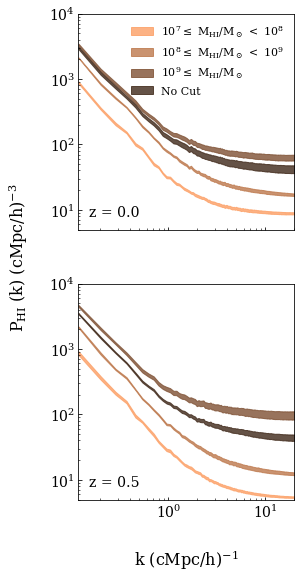

In [8]:
ip = {'fieldname':'hisubhalo', 'HI_res':['diemer', 'low-bin', 'mid-bin', 'high-bin'],
     'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'HIbt']}
fg = ds.figrid('HI_res', 'snapshot', '', ip)
fg.plotArgs('diemer', {'label':'No Cut'})
fg.autoFill({'alpha':0.8})
fg.setYLabel(YLAB%r"\mathrm{HI}")
fg.setXLabel(XLAB)
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(5, 1e4)})
fg.legendArgs({'fontsize':11}, (0, 0))
fg.plot()
# fg.save('HI-bins_auto_snapshot_space.png')

# Making HI-bins figure for paper

Excluding the z=0.5 snapshot since it's mostly redundant. Also adding the HI/stmass histograms

The row values for snapshot: [99]
The column values for : ['no key found']


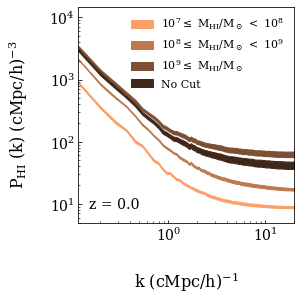

In [9]:
def mask_zeros(axis, data, kwargs):
    zeromask = data[1] > 0
    axis.fill_between(data[0][zeromask], data[1][zeromask], data[2][zeromask], **kwargs)
    return

ip = {'fieldname':'hisubhalo', 'HI_res':['diemer', 'low-bin', 'mid-bin', 'high-bin'],
     'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'HIbt'], 'snapshot':99}
fg = ds.figrid('HI_res', 'snapshot', '', ip)
fg.plotArgs('diemer', {'label':'No Cut'})
fg.autoFill()
fg.setXLabel(XLAB)
fg.setYLabel(YLAB%r"\mathrm{HI}")
fg.legendArgs({'fontsize':11})
fg.axisArgs({'ylim':(5, 1.5e4)})
fg.plot()

The row values for : ['no key found']
The column values for : ['no key found']


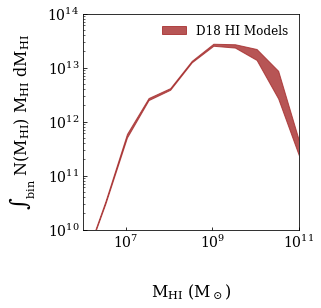

In [10]:
ip = {'is_hist':True, 'fieldname':'hisubhalo', 'is_hydrogen':True}
hifg = ds.figrid('model', '', '', ip)
hifg.fill(ip, {'color':'brown', 'alpha':0.8, 'label':'D18 HI Models'})
hifg.setFunc({'figrid_process':'fill'}, mask_zeros)
ypos = hifg.defaultAxLabelPos('y')
hifg.axisArgs({'xlim':(1e6, 1e11), 'ylim':(1e10, 1e14)})
hifg.setXLabel(r"M$_{\mathrm{HI}}$ (M$_\odot$)")
hifg.setYLabel(r"$\int_{\mathrm{bin}}$ N(M$_{\rm{HI}}$) M$_{\rm{HI}}$ dM$_{\rm{HI}}$", pos = [0.1, ypos[1]])
hifg.gspecArgs(xborder = [0.5, 0])
hifg.plot()

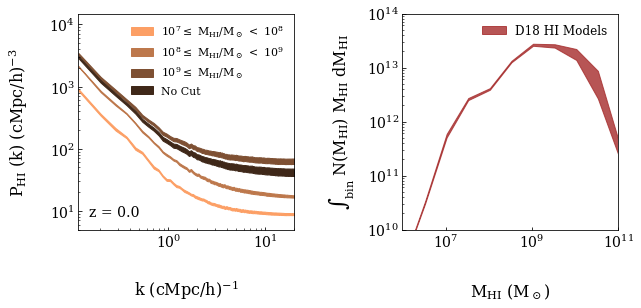

In [11]:
fig = ds.combine([fg, hifg])
# fig.savefig(DRAFTPATH + 'HI_auto_bins_histogram.pdf')
# fig.savefig('HI_auto_bins_histogram.png')

# HIxGalaxy, for HI bins

The row values for snapshot: [99, 67]
The column values for : ['no key found']


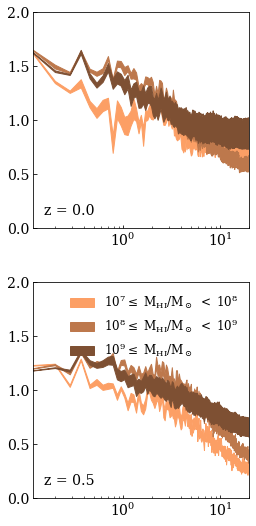

In [13]:
ip = {'is_auto':False, 'path':'HIbt', 'color':'ratio', 'censat':'both', 
      'HI_res':['low-bin', 'mid-bin', 'high-bin'], 'space':'real'}
fg = ds.figrid('HI_res', 'snapshot', '', ip)
fg.autoFill()
fg.axisArgs(yscale = 'linear', ylim = (0, 2))
fg.plot()

# HIxGalaxy censat HI auto

The row values for HI_res: ['low-bin', 'mid-bin', 'high-bin']
The column values for : ['no key found']


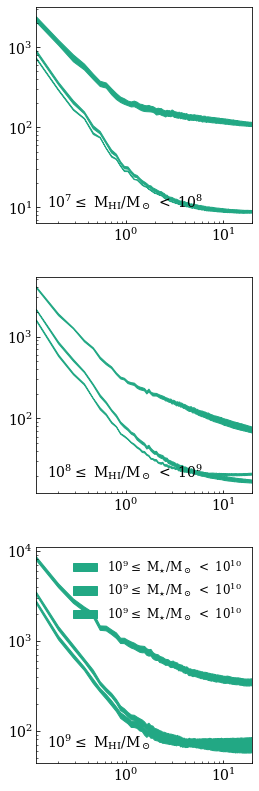

In [23]:
ip = {'fieldname':'hisubhalo', 'HI_res':['low-bin', 'mid-bin', 'high-bin'],
     'is_auto':True, 'censat':['centrals', 'satellites','both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['HIbt'], 'snapshot':99}
fg = ds.figrid('censat', 'HI_res', '', ip)
fg.autoFill()
fg.plot()

The row values for snapshot: [99, 67]
The column values for : ['no key found']


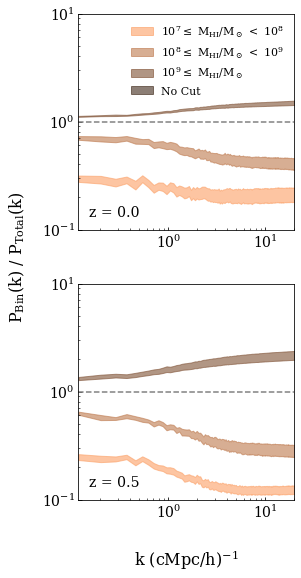

In [10]:
ip = {'fieldname':'hisubhalo', 'HI_res':['diemer', 'low-bin', 'mid-bin', 'high-bin'],
     'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'HIbt']}
fg = ds.figrid('HI_res', 'snapshot', '', ip)
fg.autoNorm('diemer', ['model'])
fg.setYLabel(r"P$_{\mathrm{Bin}}$(k) / P$_{\mathrm{Total}}$(k)")
fg.setXLabel(XLAB)
fg.autoFill({'alpha':0.6})
fg.plotArgs('diemer', {'visible':False})
fg.axisArgs({'ylim':(.1, 10)})
fg.legendArgs({'fontsize':11}, (0,0))
fg.plot()
fg.plotOnes()

# fg.save('HI-bins_ratios_auto_snapshot_space.png')

# HI thresholds auto power

The row values for snapshot: [99, 67]
The column values for : ['no key found']


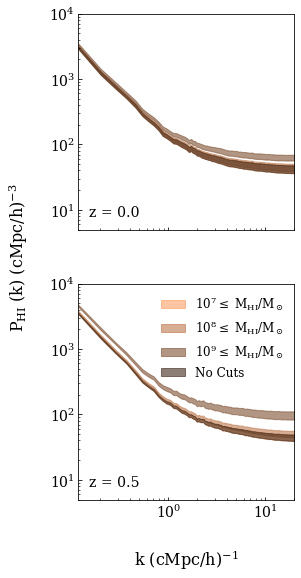

In [16]:
ip = {'fieldname':'hisubhalo', 'HI_res':['diemer', 'low-threshold', 'mid-threshold', 'high-threshold'],
     'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'HIbt']}
fg = ds.figrid('HI_res', 'snapshot', '', ip)
fg.plotArgs('diemer', {'label':'No Cuts'})
fg.autoFill({'alpha':0.6})
fg.setYLabel(YLAB%r"\mathrm{HI}")
fg.setXLabel(XLAB)
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(5, 1e4)})
fg.legendArgs({}, (-1,-1))
fg.plot()
# fg.save('HI-thresholds_auto_snapshot_space.png')

The row values for space: ['real', 'redshift']
The column values for snapshot: [99, 67]


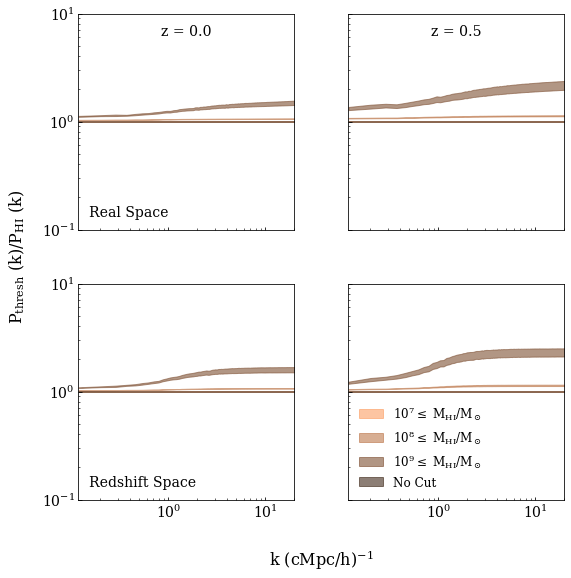

In [17]:
ip = {'fieldname':'hisubhalo', 'HI_res':['diemer', 'low-threshold', 'mid-threshold', 'high-threshold'],
     'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':['real', 'redshift'],
     'grid_resolution':800, 'path':['fiducial', 'HIbt']}
fg = ds.figrid('HI_res', 'space', 'snapshot', ip)
fg.autoNorm('diemer', ['model'])

fg.autoFill({'alpha':0.6})
fg.setYLabel("P$_{\mathrm{thresh}}$ (k)/P$_{\mathrm{HI}}$ (k)")
fg.setXLabel(XLAB)
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(.1,10)})
fg.legendArgs({'loc':'lower left'}, (-1,-1))
fg.plot()
# fg.save('HI-thresholds_ratio_auto_snapshot_space.png')


# HI-Galaxy Cross Power Bins

The row values for color: ['blue', 'red', 'resolved']
The column values for snapshot: [99, 67]


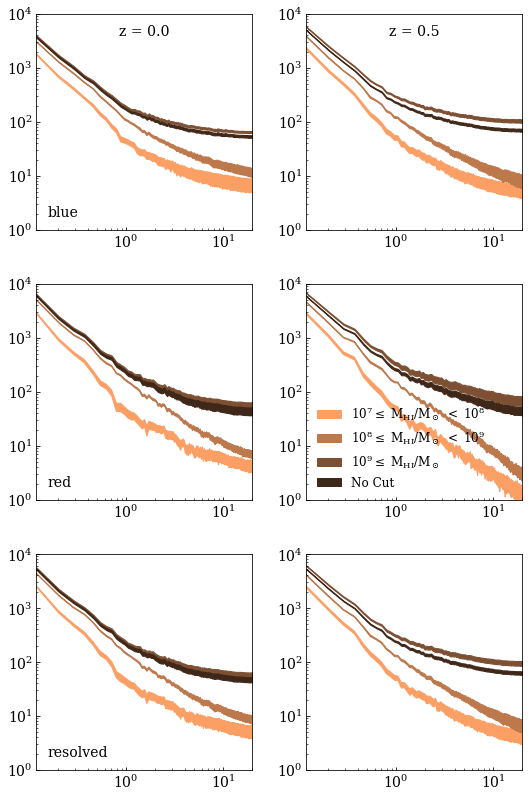

In [15]:
ip = {'HI_fieldname':'hisubhalo', 'HI_res':['diemer', 'low-bin', 'mid-bin', 'high-bin'],
     'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'HIbt'], 'gal_res':'diemer', 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found'}
fg = ds.figrid('HI_res', 'color', 'snapshot', ip)
fg.legendArgs({'loc':'lower left'}, (1, 1))
fg.axisArgs(ylim = (1, 1e4))
fg.autoFill()
fg.plot()

The row values for snapshot: [99, 67]
The column values for HI_res: ['diemer', 'low-bin', 'mid-bin', 'high-bin']


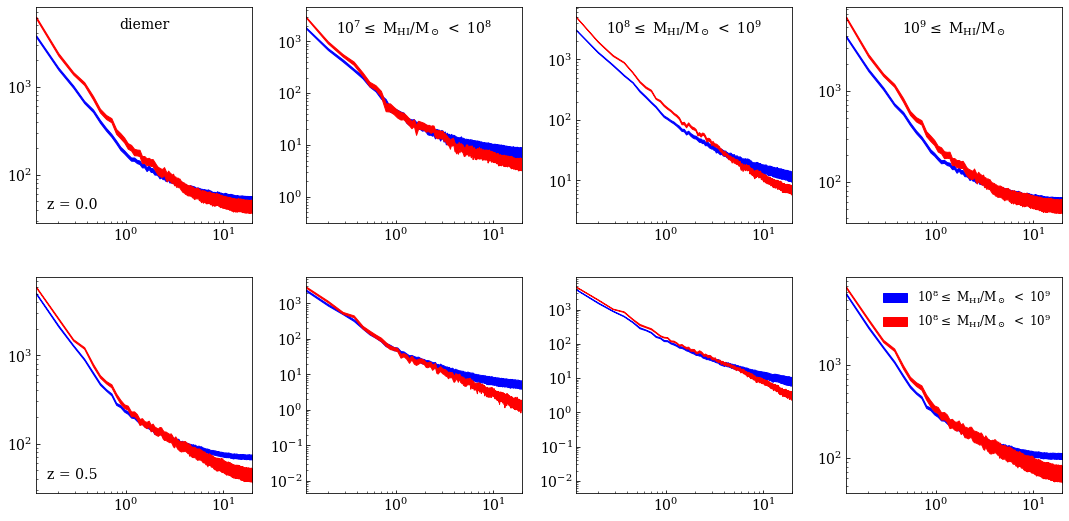

In [14]:
ip = {'HI_fieldname':'hisubhalo', 'HI_res':['diemer', 'low-bin', 'mid-bin', 'high-bin'],
     'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'HIbt'], 'gal_res':'diemer', 'color':['blue', 'red'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found'}
fg = ds.figrid('color', 'snapshot', 'HI_res', ip)
# fg.legendArgs({'loc':'lower left'}, (1, 1))
fg.autoFill()
fg.plot()

The row values for color: ['blue', 'red']
The column values for HI_res: ['diemer', 'low-bin', 'mid-bin', 'high-bin']


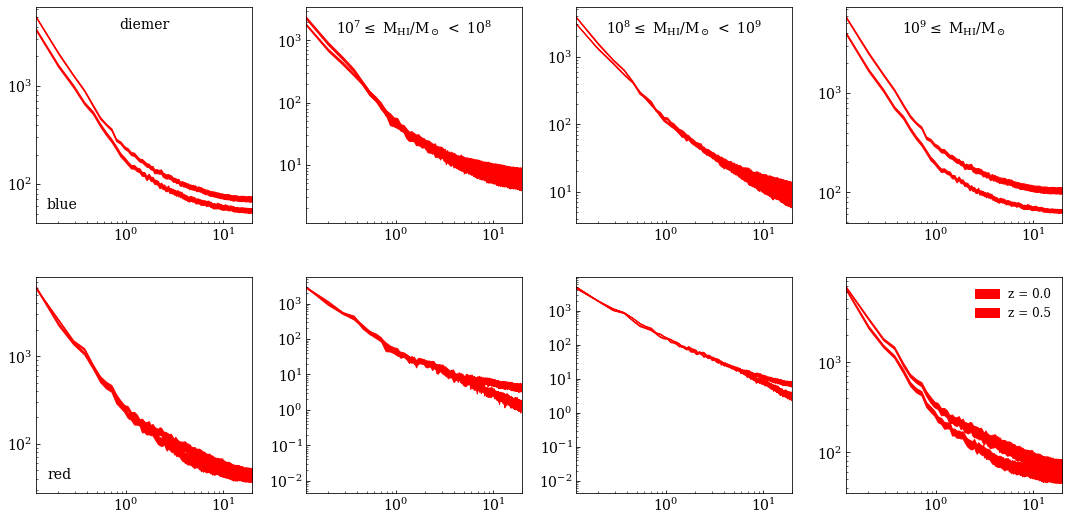

In [15]:
ip = {'HI_fieldname':'hisubhalo', 'HI_res':['diemer', 'low-bin', 'mid-bin', 'high-bin'],
     'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'HIbt'], 'gal_res':'diemer', 'color':['blue', 'red'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found'}
fg = ds.figrid('snapshot', 'color', 'HI_res', ip)
# fg.legendArgs({'loc':'lower left'}, (1, 1))
fg.autoFill()
# fg.plotArgs(99, color = 'black')
# fg.plotArgs(67, color = 'blue')
fg.plot()

# hisubhalo-galaxy color figure

The row values for snapshot: [99, 67]
The column values for : ['no key found']


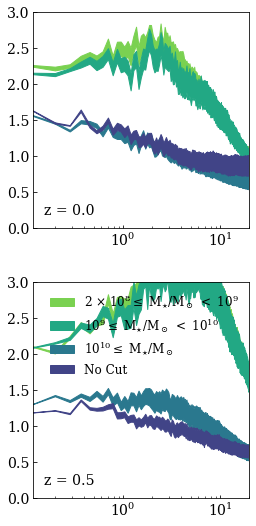

In [18]:
ip = {'color':'ratio', 'path':['galbt', 'fiducial'], 'is_auto':False, 'censat':['both', 'no key found'], 'space':'real',
     'gal_res':['diemer', 'high-bin', 'mid-bin', 'low-bin'], 'post_process':'no key found', 'HI_fieldname':'hisubhalo'}


fg = ds.figrid('gal_res', 'snapshot', '', ip)
fg.autoFill()
fg.axisArgs({'yscale':'linear', 'ylim':(0,3)})
fg.plot()

# Galaxy Auto Power Stellar Mass Bins

The row values for color: ['blue', 'red', 'resolved']
The column values for snapshot: [99, 67]


{'ha': 'left', 'va': 'bottom', 'fontsize': 14}

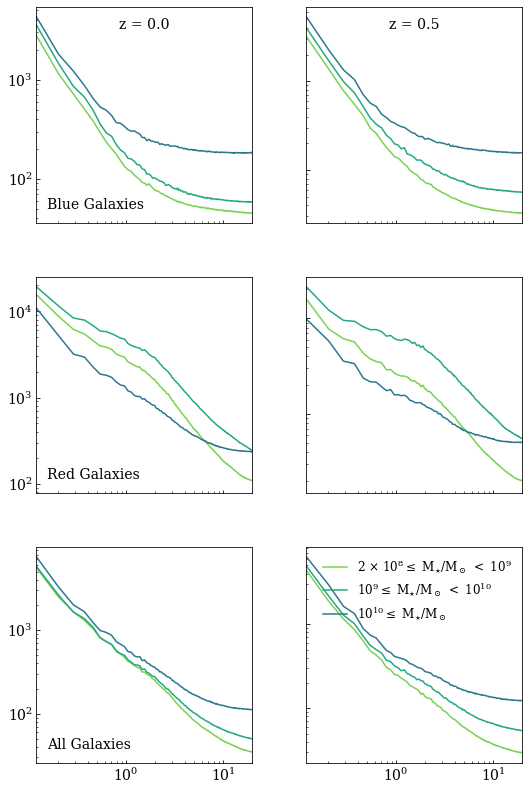

In [20]:
ip = {'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'galbt'], 'gal_res':bins, 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found', 'fieldname':'galaxy'}
fg = ds.figrid('gal_res', 'color', 'snapshot', ip)
fg.rowLabels(['Blue Galaxies', 'Red Galaxies', 'All Galaxies'])
fg.setDefaultTicksParams()
fg.plot()


The row values for color: ['blue', 'red', 'resolved']
The column values for gal_res: ['low-bin', 'mid-bin', 'high-bin']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


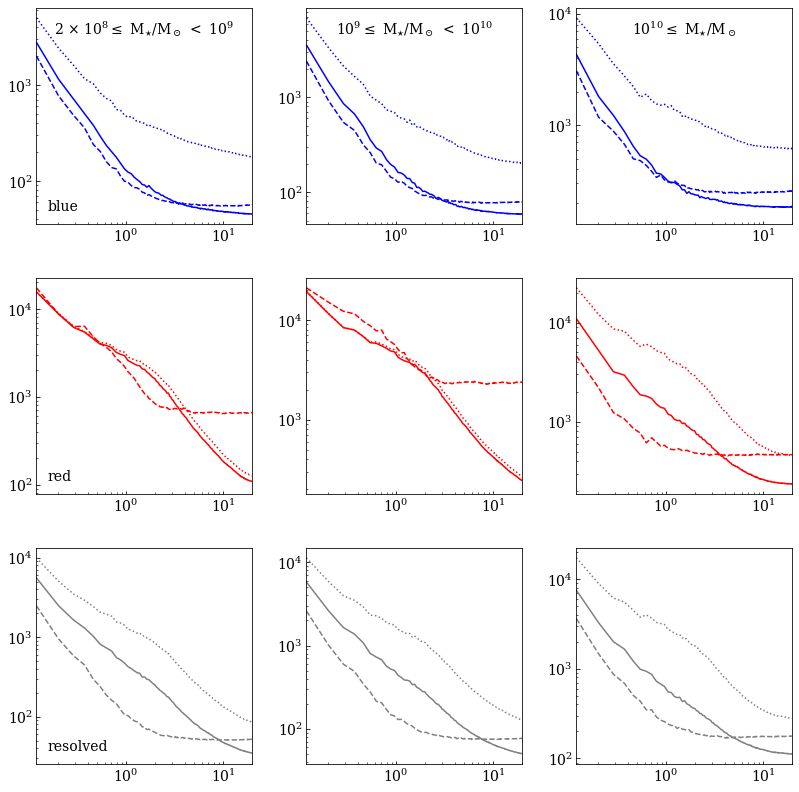

In [19]:
ip['censat'] += ['satellites', 'centrals']
ip['snapshot'] = 99
ip['gal_res'] = bins
fg = ds.figrid('censat', 'color', 'gal_res', ip)
fg.plotArgs('satellites', linestyle = 'dotted', label = 'Satellites')
fg.plotArgs('centrals', linestyle = 'dashed')
fg.plotArgs({'color':'blue'}, color = 'blue')
fg.plotArgs({'color':'red'}, color = 'red')
fg.plotArgs({'color':'resolved'}, color = 'gray')
fg.plot()

# Making Figure for Paper

The row values for color: ['blue', 'red', 'resolved']
The column values for : ['no key found']


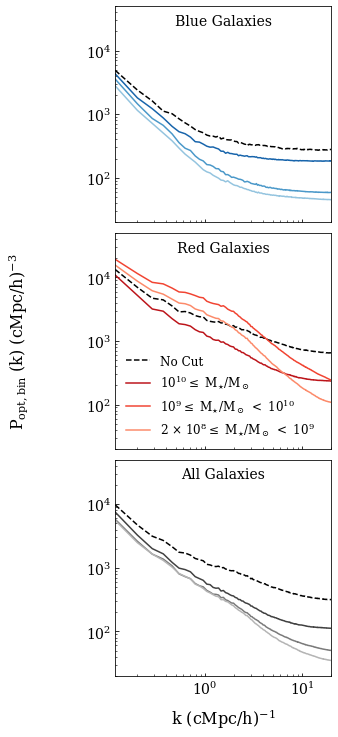

In [22]:

ip = {'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'galbt'], 'gal_res':bins + ['diemer'], 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found', 'fieldname':'galaxy', 'snapshot':99}
fg = ds.figrid('gal_res', 'color', '', ip)
fg.gspecArgs(hspace = 0.05, yborder = [0, 0.25])
fg.rowLabels(['Blue Galaxies', 'Red Galaxies', 'All Galaxies'], pos = [0.5, 0.9])
fg.rowLabelArgs(ha = 'center')
fg.legendArgs(loc = 'lower left', fontsize = 12, slc = (1, 0))
fg.plotOrder(['diemer', 'high-bin', 'mid-bin', 'low-bin'])
fg.setDefaultTicksParams()
fg.axisArgs(ylim = (2e1, 5e4))

gal_res = ip['gal_res'][:3]

cmaps = {}
cmaps['blue'] = seaborn.color_palette('Blues', len(gal_res) + 1)
cmaps['red'] = seaborn.color_palette('Reds', len(gal_res)+ 1)
cmaps['resolved'] = seaborn.color_palette('Greys', len(gal_res) + 1)
for c in ip['color']:
    for b in range(len(gal_res)):
        col = cmaps[c][b+1]
        fg.plotArgs({'color':c, 'gal_res':gal_res[b]}, {'color':col})
fg.plotArgs('diemer', linestyle = '--', color = 'black')
fg.setYLabel(YLAB%r"\mathrm{opt, bin}")
fg.setXLabel(XLAB)
fg.plot()
fg.save("galaxy_auto_stmass_bins_colorR.png")
fg.save(DRAFTPATH + "galaxy_auto_stmass_bins_colorR.pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The row values for : ['no key found']
The column values for : ['no key found']


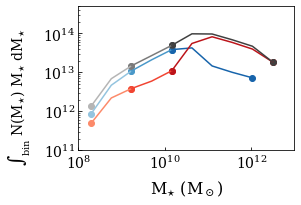

In [11]:
ip = {'is_hist':True, 'fieldname':'galaxy', 'is_hydrogen':False, 'censat':'both'}
def coolplot(ax, data, args):
    new_args = copy.deepcopy(args)
    cmaps['blue'] = seaborn.color_palette('Blues', 4)
    cmaps['red'] = seaborn.color_palette('Reds', 4)
    cmaps['gray'] = seaborn.color_palette('Greys', 4)
    
    cmap = cmaps[args['color']]
    idx = [0, 3, 5, len(data[0])]
    for i in range(3):
        new_args['color'] = cmap[i + 1]
        if i == 0: 
            x = data[0][idx[i]:idx[i+1]]
            y = data[1][idx[i]:idx[i+1]]
        else:
            x = data[0][idx[i]-1:idx[i+1]]
            y = data[1][idx[i]-1:idx[i+1]]

        mask = y > 0
        ax.plot(x[mask], y[mask], **new_args)
        ax.scatter([x[mask][0], x[mask][-1]], [y[mask][0], y[mask][-1]], color = new_args['color'])
    return
    
hgfg = ds.figrid('color', '', '', ip)
hgfg.setPanelsize(3, 2)
hgfg.gspecArgs(yborder = [0.5, 0.33])
hgfg.axisLabelArgs('y', fontsize = 14)
hgfg.setXLabel(r"M$_{\mathrm{\star}}$ (M$_\odot$)")
hgfg.setYLabel(r"$\int_{\mathrm{bin}}$ N(M$_{\rm{\star}}$) M$_{\rm{\star}}$ dM$_{\rm{\star}}$")
hgfg.setFunc({'is_hist':True}, coolplot)
hgfg.axisArgs(xlim = (1e8, 1e13), ylim = (1e11, 5e14))
hgfg.plot()
# hgfg.save("histogram_galaxies.png")
# hgfg.save(DRAFTPATH + "histogram_galaxies.pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


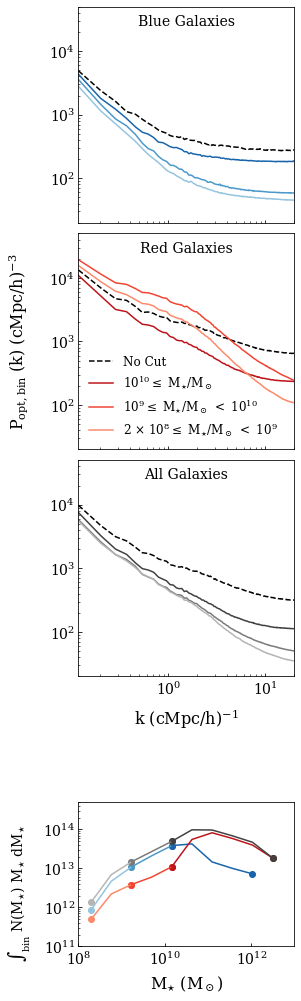

In [12]:
arr = np.array([[fg], [hgfg]])
cfig = ds.combine(arr)
cfig.savefig("hist_and_galaxy_auto_bins.png")
cfig.savefig(DRAFTPATH + "hist_and_galaxy_auto_bins.pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The row values for : ['no key found']
The column values for gal_res: ['low-bin', 'mid-bin', 'high-bin']


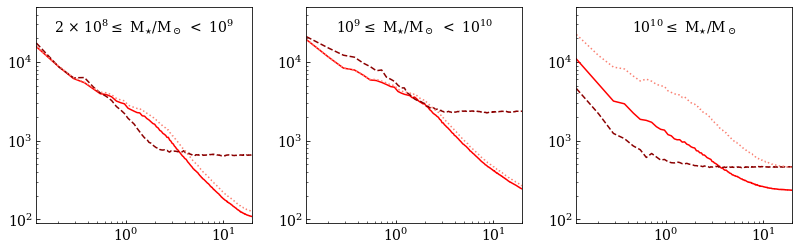

In [16]:
ip = {'is_auto':True, 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'galbt'], 'gal_res':bins, 'color':'red',
     'color_cut':['0.60'], 'post_process':'no key found', 'fieldname':'galaxy', 'snapshot':99}
fg = ds.figrid('censat', '', 'gal_res', ip)
fg.axisArgs(ylim = (9e1, 5e4))
fg.plotArgs('centrals', color = 'darkred', linestyle = 'dashed')
fg.plotArgs('satellites', color = 'salmon', linestyle = 'dotted')
fg.plotArgs('both', color = 'red')
fg.plot()

The row values for : ['no key found']
The column values for color: ['blue', 'red', 'resolved']


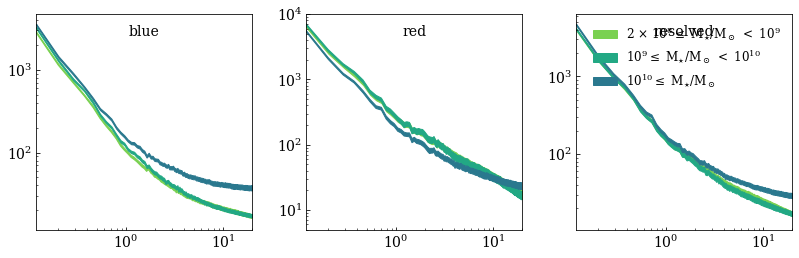

In [24]:
ip = {'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':'galbt', 'gal_res':bins, 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found', 'snapshot':99, 'HI_fieldname':'hisubhalo'}
fg = ds.figrid('gal_res', '', 'color', ip)
fg.autoFill()
fg.plot()

The row values for color: ['blue', 'red', 'resolved']
The column values for gal_res: ['low-bin', 'mid-bin', 'high-bin']


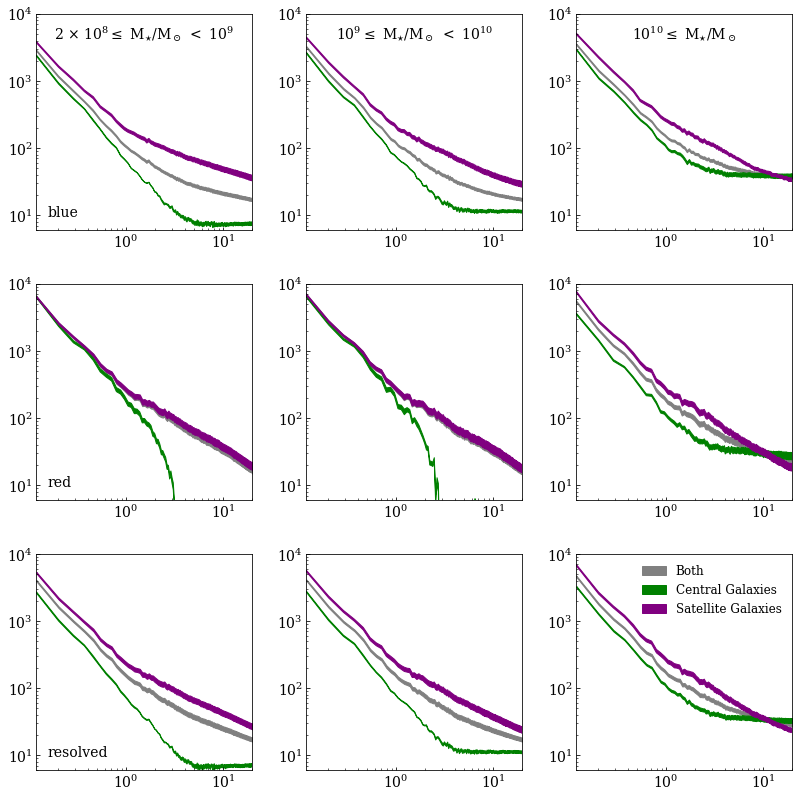

In [41]:
ip = {'is_auto':False, 'censat':['both_satellites', 'both_centrals', 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':'galbt', 'gal_res':bins, 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found', 'snapshot':99, 'HI_fieldname':'hisubhalo'}
fg = ds.figrid('censat', 'color', 'gal_res', ip)
blue_colors = seaborn.color_palette("mako", 3)
fg.plotArgs('both', color = 'gray', label = 'Both')
fg.plotArgs('both_satellites', color = 'purple', label = 'Satellite Galaxies')
fg.plotArgs('both_centrals', color = 'green', label = 'Central Galaxies')
fg.autoFill()
fg.axisArgs(ylim = (6, 1e4))
fg.plot()

The row values for : ['no key found']
The column values for color: ['blue', 'red', 'resolved']


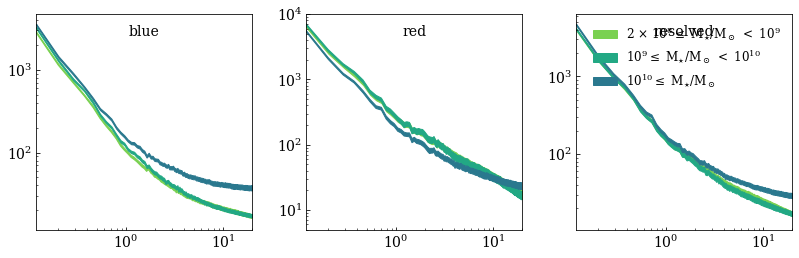

In [42]:
ip = {'is_auto':False, 'censat':'both', 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':'galbt', 'gal_res':bins, 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found', 'snapshot':99, 'HI_fieldname':'hisubhalo'}
fg = ds.figrid('gal_res', '', 'color', ip)
fg.autoFill()
fg.plot()